In [1]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import random


DATADIR = "PetImages"

CATEGORIES = ["Dog", "Cat"]

IMG_SIZE = 50



In [2]:

training_data = []

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR, category)  # create path to dogs and cats
    class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

    for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
        try:
            img_array = cv2.imread(os.path.join(path, img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass

random.shuffle(training_data)
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

  3%|▎         | 412/12501 [00:03<01:34, 127.83it/s]

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

import pickle

NAME = f'cats-vs-dogs-64x2{ int(time.time()) }'

tensorboard = TensorBoard(log_dir = f"logs/{NAME}")

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y =  np.array(pickle.load(pickle_in))

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(64))
# model.add(Activation('relu'))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.fit(
    X,
    y,
    batch_size = 32,
    epochs = 10,
    validation_split = 0.3,
    callbacks = [tensorboard]
)

Epoch 1/10
546/546 [==============================] - 15s 23ms/step - loss: 0.6520 - accuracy: 0.6105 - val_loss: 0.5933 - val_accuracy: 0.6845
Epoch 2/10
546/546 [==============================] - 12s 22ms/step - loss: 0.5714 - accuracy: 0.7035 - val_loss: 0.5608 - val_accuracy: 0.7090
Epoch 3/10
546/546 [==============================] - 11s 20ms/step - loss: 0.5104 - accuracy: 0.7486 - val_loss: 0.5359 - val_accuracy: 0.7325
Epoch 4/10
546/546 [==============================] - 11s 20ms/step - loss: 0.4722 - accuracy: 0.7732 - val_loss: 0.5285 - val_accuracy: 0.7405
Epoch 5/10
546/546 [==============================] - 11s 21ms/step - loss: 0.4395 - accuracy: 0.7956 - val_loss: 0.4567 - val_accuracy: 0.7879
Epoch 6/10
546/546 [==============================] - 12s 21ms/step - loss: 0.4121 - accuracy: 0.8108 - val_loss: 0.4580 - val_accuracy: 0.7827
Epoch 7/10
546/546 [==============================] - 11s 20ms/step - loss: 0.3821 - accuracy: 0.8280 - val_loss: 0.4362 - val_accuracy:

In [4]:
model.save('cats-vs-dogs.model')

INFO:tensorflow:Assets written to: cats-vs-dogs.model\assets


In [6]:
import tensorflow as tf
print(len(tf.config.list_physical_devices('GPU')))

1


In [6]:
import tensorflow as tf
model = tf.keras.models.load_model('cats-vs-dogs.model')




100%|██████████| 11/11 [00:03<00:00,  3.52it/s]


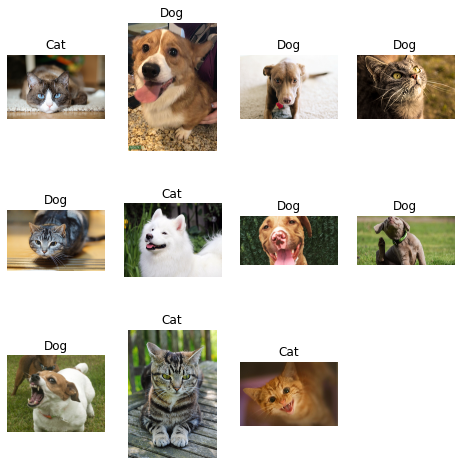

In [9]:

# import pickle
# import numpy as np
# import matplotlib.pyplot as plt

# X = pickle.load(open("X.pickle","rb"))
# X = X/255.0
# y =  np.array(pickle.load(open("y.pickle","rb")))

# for i in X[:10]:
#     plt.figure()
#     plt.imshow(i,cmap=plt.cm.gray)
# print(model.predict(X[:10]))
# print(y[:10])
from PIL import Image
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt





def download(links):
    result = []
    for link in links:
        result.append(Image.open(requests.get(link, stream = True).raw))
    return result

def process(images):
    processed = []
    for image in images:
        processed.append(cv2.resize(np.array(image.convert('L')), (IMG_SIZE, IMG_SIZE)))
    prediction = model.predict([np.array(processed).reshape(-1, IMG_SIZE, IMG_SIZE, 1)])
    result = []
    for i in prediction:
        result.append(CATEGORIES[int(i[0])])
    return result




links = tqdm([
    'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fd.newsweek.com%2Fen%2Ffull%2F1759425%2Fsnowshoe-cat.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.breedyourdog.com%2Fuploads%2Flisting_images%2F31363%2F87883%2Fbig_1569F636-2C84-4356-AC8F-E18C17152D81.jpeg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwallup.net%2Fwp-content%2Fuploads%2F2018%2F10%2F06%2F336068-puppy-dog-pitbull.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwallup.net%2Fwp-content%2Fuploads%2F2017%2F11%2F23%2F514780-cat-cat_eyes-animals.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwallup.net%2Fwp-content%2Fuploads%2F2017%2F11%2F23%2F498099-animals-feline-cat.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwallup.net%2Fwp-content%2Fuploads%2F2018%2F10%2F07%2F766809-samoyed-dog-dogs-canine.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fassets3.thrillist.com%2Fv1%2Fimage%2F2711190%2F1200x600%2Fcrop%3B&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.businessinsider.in%2Fphoto%2F81878541%2F5-reasons-why-your-dog-is-constantly-scratching-themself.jpg%3Fimgsize%3D180883&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.panaynews.net%2Fwp-content%2Fuploads%2F2019%2F12%2FRabid-Dog.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.katyjon.com%2Fwp-content%2Fuploads%2F2014%2F10%2FTabby-macro.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fcdn.chatsports.com%2Fthumbnails%2F2045-1118-original.jpeg&f=1&nofb=1'
])
images = download(links)

fig = plt.figure(figsize = (8, 8))
label = process(images)
for i in range(len(images)):
    ax = fig.add_subplot(3, 4, i+1)
    ax.set_title(label[i])
    plt.axis('off')
    plt.imshow(images[i])
